In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.statespace.sarimax import SARIMAX

import warnings
warnings.simplefilter(action = 'ignore')

In [33]:
amzn = pd.read_csv("dataset/AMZN_2006-01-01_to_2018-01-01.csv")
googl = pd.read_csv("dataset/GOOGL_2006-01-01_to_2018-01-01.csv")
ibm = pd.read_csv("dataset/IBM_2006-01-01_to_2018-01-01.csv")
msft = pd.read_csv("dataset/MSFT_2006-01-01_to_2018-01-01.csv")
aapl = pd.read_csv("dataset/AAPL_2006-01-01_to_2018-01-01.csv")
intc = pd.read_csv("dataset/INTC_2006-01-01_to_2018-01-01.csv")
vz = pd.read_csv("dataset/VZ_2006-01-01_to_2018-01-01.csv")
amd = pd.read_csv("dataset/AMD.csv")
nvda = pd.read_csv("dataset/nvidia_all_time_daily_stock_prices.csv")
aaba = pd.read_csv("dataset/AABA_2006-01-01_to_2018-01-01.csv")

In [34]:
#
amd['Date'] = pd.to_datetime(amd['Date'])
nvda['Date'] = pd.to_datetime(nvda['Date'])
start_date = pd.to_datetime('2006-01-03')
end_date = pd.to_datetime('2017-12-29')
amd_crop = amd[(amd['Date'] >= start_date) & (amd['Date'] <= end_date)]
amd_crop = amd_crop.reset_index(drop=True)
amd_crop['Close'] = amd_crop['Close'].round(2)
nvda_crop = nvda[(nvda['Date'] >= start_date) & (nvda['Date'] <= end_date)]
nvda_crop = nvda_crop.reset_index(drop = True)
nvda_crop['Close'] = nvda_crop['Close'].round(2)

In [35]:
data = pd.concat([amzn[['Date','Close']], googl["Close"], msft["Close"], aapl["Close"], intc['Close'], 
                  nvda_crop['Close'], amd_crop['Close'], ibm["Close"], vz['Close'], aaba['Close']], axis = 1)
data.columns = ['Date', 'amzn', 'googl', 'msft', 'aapl', 'intc','nvda', 'amd', 'ibm', 'vz', 'aaba']
data['Date'] = pd.to_datetime(data['Date'])
data = data.drop(data.index[-1])
data

,Date,amzn,googl,msft,aapl,intc,nvda,amd,ibm,vz,aaba
0,2006-01-03,47.58,217.83,26.84,10.68,25.57,3.18,32.40,82.06,30.38,40.91
1,2006-01-04,47.25,222.84,26.97,10.71,25.91,3.27,32.56,81.95,31.27,40.97
2,2006-01-05,47.65,225.85,26.99,10.63,26.27,3.35,33.68,82.50,31.63,41.53
3,2006-01-06,47.87,233.06,26.91,10.90,26.31,3.40,33.78,84.95,31.35,43.21
4,2006-01-09,47.08,233.68,26.86,10.86,26.47,3.50,33.25,83.73,31.48,43.42
...,...,...,...,...,...,...,...,...,...,...,...
3014,2017-12-22,1168.36,1068.86,85.51,175.01,46.70,48.97,10.89,151.50,53.01,71.58
3015,2017-12-26,1176.76,1065.85,85.40,170.57,46.08,48.82,10.54,152.50,53.19,69.86
3016,2017-12-27,1182.26,1060.20,85.71,170.60,46.11,49.36,10.46,152.83,53.22,70.06
3017,2017-12-28,1186.10,1055.95,85.72,171.08,46.22,49.29,10.53,153.13,53.28,69.82


In [36]:
NaN_count = data.isnull().sum()
NaN_count

Date     0
amzn     0
googl    0
msft     0
aapl     0
intc     0
nvda     0
amd      0
ibm      0
vz       0
aaba     0
dtype: int64

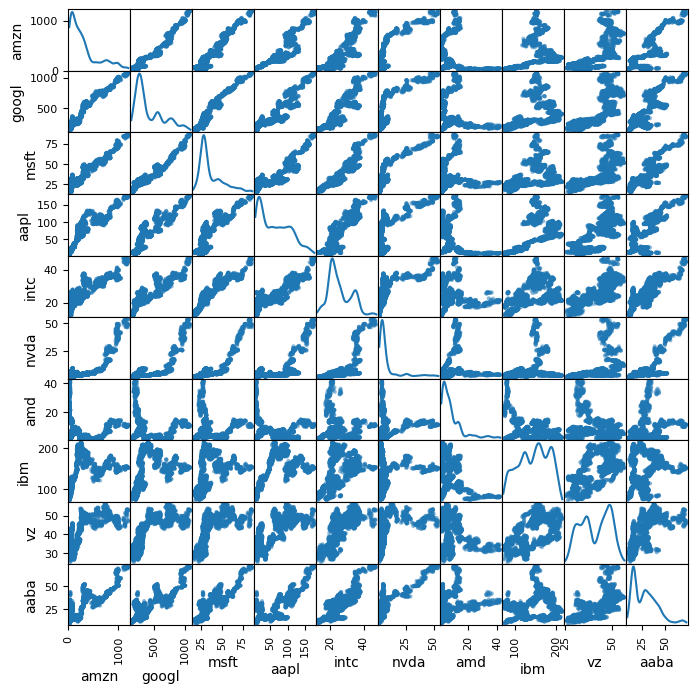

In [37]:
pd.plotting.scatter_matrix(data, figsize = (8,8), diagonal = 'kde')
plt.show()

In [46]:
from statsmodels.tsa.stattools import adfuller

def adfullertest(columnname):
    result = adfuller(columnname)
    print(f'ADF Statistic for {column}: {result[0]}')
    print(f'p-value for {column}: {result[1]}')
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'   {key}: {value}')
    print('Is Stationary:', result[1] < 0.05)

# Assuming 'data' is your DataFrame with a datetime index and multiple variables
for column in data.columns[1:]:
    result = adfuller(data[column])
    print(f'ADF Statistic for {column}: {result[0]}')
    print(f'p-value for {column}: {result[1]}')
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'   {key}: {value}')
    print('Is Stationary:', result[1] < 0.05)

ADF Statistic for amzn: 2.9638082255195877
p-value for amzn: 1.0
Critical Values:
   1%: -3.4325396703967974
   5%: -2.862507454335551
   10%: -2.5672850015989264
Is Stationary: False
ADF Statistic for googl: 1.3224241360302167
p-value for googl: 0.9967315857800989
Critical Values:
   1%: -3.4325396703967974
   5%: -2.862507454335551
   10%: -2.5672850015989264
Is Stationary: False
ADF Statistic for msft: 2.1707913697890535
p-value for msft: 0.9988575993461946
Critical Values:
   1%: -3.4325265517435293
   5%: -2.8625016602846984
   10%: -2.567281916911753
Is Stationary: False
ADF Statistic for aapl: 0.552367204190558
p-value for aapl: 0.9863807814299046
Critical Values:
   1%: -3.4325345499510043
   5%: -2.8625051928165557
   10%: -2.5672837975912697
Is Stationary: False
ADF Statistic for intc: -0.1282667375765534
p-value for intc: 0.9465492557585924
Critical Values:
   1%: -3.4325294533972204
   5%: -2.862502941845959
   10%: -2.567282599200112
Is Stationary: False
ADF Statistic for 

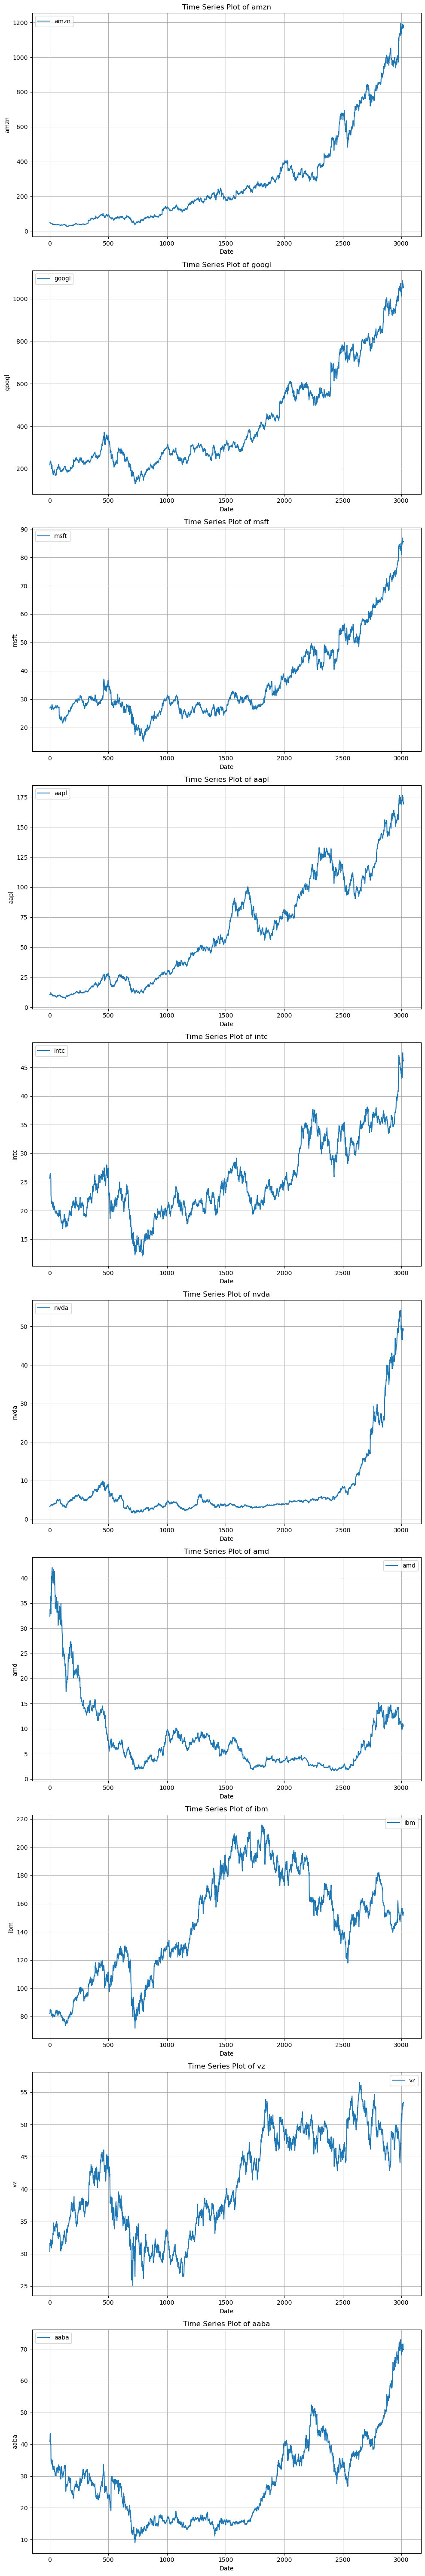

In [39]:
variables_to_plot = data.columns[1:]  # Get all column names

# Create subplots for each variable
num_variables = len(variables_to_plot)
fig, axes = plt.subplots(num_variables, 1, figsize=(10, 6*num_variables))

for i, variable in enumerate(variables_to_plot):
    axes[i].plot(data.index, data[variable], label=variable)
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel(variable)
    axes[i].set_title('Time Series Plot of ' + variable)
    axes[i].legend()
    axes[i].grid(True)

plt.tight_layout()
plt.show()

In [41]:
stationary = data.copy()

In [49]:
stationary['amzn'] = np.sqrt(data['amzn'])
stationary['amzn']

0        6.897826
1        6.873864
2        6.902898
3        6.918815
4        6.861487
          ...    
3014    34.181281
3015    34.303936
3016    34.384008
3017    34.439803
3018    34.197515
Name: amzn, Length: 3019, dtype: float64

In [50]:
adfullertest(stationary['amzn'])

ADF Statistic for aaba: 1.566053418530341
p-value for aaba: 0.997752073723875
Critical Values:
   1%: -3.4325214923978606
   5%: -2.862499425741659
   10%: -2.5672807272674434
Is Stationary: False
